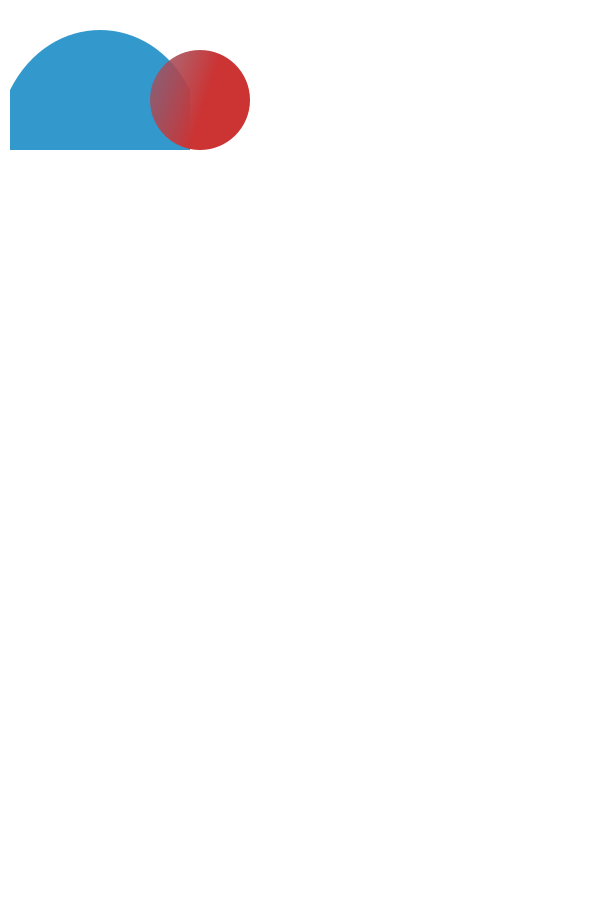

In [24]:
import cairo
from IPython.display import SVG, display
import math


# Create an SVG surface and context
surface = cairo.SVGSurface("spline_example.svg", 600, 900)
context = cairo.Context(surface)

# Set line width
context.set_line_width(2)

# Move to the start of the spline
context.move_to(10, 90)

# Set up the curve
context.move_to(10, 90)  # Start point
context.curve_to(50, 10, 150, 10, 190, 90)  # Bézier curve

# Optionally, close the curve to form a closed shape
context.line_to(190, 150)  # Line downwards to create a closed shape
context.line_to(10, 150)   # Line leftwards to create a closed shape
context.close_path()  # Close the path back to the starting point

# Set the fill color
context.set_source_rgb(0.2, 0.6, 0.8)  # Set a color for the fill (e.g., light blue)

# Fill the curve
context.fill()

context.new_path()
context.arc(200, 100, 50, 0, 2 * math.pi)

# Define a linear gradient
gradient = cairo.LinearGradient(10, 90, 190, 150)
gradient.add_color_stop_rgba(0, 0.2, 0.6, 0.8, 0.5)  # Start color (light blue)
gradient.add_color_stop_rgba(1, 0.8, 0.2, 0.2, 1)  # End color (light red)

# Apply the gradient as the fill pattern
context.set_source(gradient)
context.fill()

# Stroke the outline (optional, to see the border of the filled shape)
context.stroke()
context.set_line_width(2)
context.stroke()


# Finish the drawing
surface.finish()

display(SVG('spline_example.svg'))



    M 100 100 
    C 200 50, 500 200, 400 400
    S 300 400, 250 250
    S 100 200, 100 250
    S 0 150, 100 100



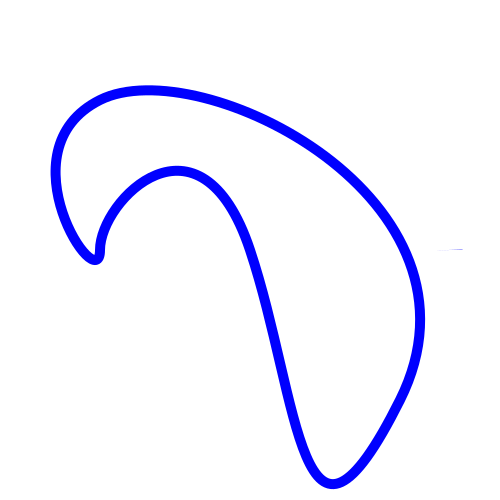

In [49]:
from IPython.display import SVG, display
import svgwrite
import math
import numpy as np
from scipy.special import comb

WIDTH = 500
HEIGHT = 500

def w(p):
    return p/100 * WIDTH

def h(p):
    return p/100 * HEIGHT

def bezier_point(t, control_points):
    """
    Calculate a point on a Bézier curve for a given parameter t.
    This works for any number of control points.

    Parameters:
    - t: The parameter (0 <= t <= 1).
    - control_points: A list or array of control points (each a tuple or array).

    Returns:
    - The point on the Bézier curve as a NumPy array.
    """
    n = len(control_points) - 1  # Degree of the Bézier curve
    point = np.zeros(2)
    for i, p in enumerate(control_points):
        bernstein_poly = comb(n, i) * (t**i) * ((1 - t)**(n - i))
        point += bernstein_poly * np.array(p)
    return point

def bezier_curve_length(control_points, num_points=100):
    """
    Estimate the length of a Bézier curve using numerical approximation.
    Works for any number of control points.

    Parameters:
    - control_points: A list or array of control points (each a tuple or array).
    - num_points: The number of segments to divide the curve into for the approximation.

    Returns:
    - The approximate length of the Bézier curve.
    """
    # Generate t values from 0 to 1
    t_values = np.linspace(0, 1, num_points)

    # Calculate points along the curve
    points = [bezier_point(t, control_points) for t in t_values]

    # Calculate the length of the curve by summing the distances between consecutive points
    length = sum(math.dist(points[i], points[i+1]) for i in range(num_points - 1))

    return length

def bezier_path_data(control_points):
    # Define the SVG path using the control points
    path_data = f"M {control_points[0][0]} {control_points[0][1]} "
    path_data += "C " + ", ".join(f"{p[0]} {p[1]}" for p in control_points[1:])
    return path_data

# Create an SVG drawing
dwg = svgwrite.Drawing('animated_circle_draw.svg', profile='tiny', size=(WIDTH, HEIGHT))

r_circle = w(40)

# Define a linear gradient
gradient_id = "grad"
linear_gradient = dwg.linearGradient((0, 0), (1, 0), id=gradient_id)
linear_gradient.add_stop_color(0, 'blue')
linear_gradient.add_stop_color(0.5, 'red')
linear_gradient.add_stop_color(1, 'blue')

# Add the gradient definition to the SVG
dwg.defs.add(linear_gradient)

# Define the circle with an initial stroke
circle = dwg.add(dwg.circle(center=(w(50), h(50)), r=r_circle, fill='none', stroke=f'url(#{gradient_id})', stroke_width=w(5)))

# Calculate the circumference of the circle
circumference = 2 * math.pi * r_circle

# Set stroke-dasharray to the circumference and stroke-dashoffset to the circumference
# This effectively makes the stroke invisible, as the entire path is "offset"
circle.update({'stroke-dasharray': circumference, 'stroke-dashoffset': circumference})

# # Add an animation to draw the stroke by reducing stroke-dashoffset from the circumference to 0
# circle.add(dwg.animate(
#     attributeName="stroke-dashoffset",
#     from_=circumference,  # Start with the stroke completely offset
#     to="0",               # End with no offset, showing the full stroke
#     dur="2s",             # Duration of the animation
#     repeatCount="indefinite"       # Animate once
# ))

###################################
control_points = [
    (10, 90),  # Start point
    (20, 70),
    (30, 50),
    # (40, 30),
    # (50, 10),
    # (60, 20),
    # (70, 40),
    # (80, 60),
    # (90, 80),
    # (100, 60),
    # (110, 40),
    # (120, 20),
    # (130, 40),
    # (140, 60),
    # (150, 80),
    # (160, 60),
    # (170, 40),
    (180, 20),
    (190, 40),
    (200, 60)  # End point
]

points = [
    {
        "position": (100, 100),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    },
    {
        "position": (200, 100),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    },
    {
        "position": (200, 200),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    },
    {
        "position": (100, 200),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    },
    {
        "position": (100, 100),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    }
]

curve_length = bezier_curve_length(control_points)
path_data = bezier_path_data(control_points)
path_data = """
    M 100 100 
    C 200 50, 500 200, 400 400
    S 300 400, 250 250
    S 100 200, 100 250
    S 0 150, 100 100
"""

print(path_data)

# Create the path with the calculated curve length as stroke-dasharray and stroke-dashoffset
path = dwg.path(d=path_data.replace('\n', '').strip(), fill='none', stroke='blue', stroke_width=10)
# path.update({'stroke-dasharray': curve_length, 'stroke-dashoffset': curve_length})

# Add an animation to draw the curve by reducing stroke-dashoffset from the curve length to 0
# path.add(dwg.animate(
#     attributeName="stroke-dashoffset",
#     from_=curve_length,  # Start with the stroke completely offset
#     to="0",              # End with no offset, showing the full stroke
#     dur="1s",            # Duration of the animation
#     repeatCount="indefinite"      # Animate once
# ))

# Add the path to the drawing
dwg.add(path)

display(dwg)

In [ ]:
from IPython.display import SVG, display
import svgwrite
import math
import numpy as np
from scipy.special import comb

points = [
    {
        "position": (100, 100),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    },
    {
        "position": (200, 100),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    },
    {
        "position": (200, 200),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    },
    {
        "position": (100, 200),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    },
    {
        "position": (100, 100),
        "type": "s",
        "strength": 0.5,
        "angle": 45
    }
]
